# Exploring Factors Impacting on View Counts and Good Practices for Music Cover Videos on Youtube

Addison 2023-03-05

## Introduction

This project aims to examine the impact of several factors on view counts of music cover videos published on Youtube based on video metadata of some of the most popular music cover channels obtained via Youtube API.

Due to a quota limit for daily usage of Youtube API, this project will only analyze data from ten Youtube channels and examine the following factors:
1. Numbers of likes and comments
2. Numbers of tags and most common tags
3. The length of videos and their titles 
4. View per video ratio
5. Creation date
6. Frequency of releasing videos
7. The day of the week and the time of the day when the videos were published

The following channels were chosen mainly based on the number of views and subscribers:
1. Madilyn Bailey
2. Megan Nicole
3. J Fla
4. The Sam Tsui
5. Music Travel Love
6. KurtHugoSchneider
7. gootmusic
8. Cimorelli
9. Boyce Avenue
10. Conor Maynard

In [1]:
from googleapiclient.discovery import build
import pandas as pd
from IPython.display import JSON
from dateutil import parser
from datetime import datetime, timedelta, timezone

import isodate
import matplotlib.pyplot as plt
import seaborn as sns
import operator


## Channel statistics
After importing supportive libraries for this project, we will create a project in the Google Developers Console and obtain authorization credentials so our application can submit API requests.

It is worth noting that the following API key was edited for privacy purposes.

In [2]:
api_key = "fake api"

Next, we will obtain the channel IDs of the videos that we want to examine via their page source information.

In [3]:
channel_id = ["UCZH4EVUqljV-zkZEd0Ot7EQ", #Madilyn Bailey
              "UChWmYNTHQpLmJdkScwNrgcA", #Megan Nicole
              "UClkRzsdvg7_RKVhwDwiDZOA", #J Fla
              "UCWrtsravWX0ANhHiJXNlyXw", #The Sam Tsui
              "UCLxAS02eWvfZK4icRNzWD_g", #Music Travel Love
              "UCplkk3J5wrEl0TNrthHjq4Q", #KurtHugoSchneider
              "UCLRpI5yd10aJxSel3e6MlNw", #gootmusic
              "UCTKDB3h5zMdf_2siDHsd_yw", #Cimorelli
              "UCgc00bfF_PvO_2AvqJZHXFg", #Boyce Avenue
              "UCpmD3iT-8TQzRuygIiS9bAw" #Conor Maynard
             ] 

Then, we will create a function and use it to obtain the **channel name, creation date, the number of subscribers/views/public videos, and playlist id** of each of the Youtube channels above.

In [4]:
api_service_name = "youtube"
api_version = "v3"

# Get credentials and create an API client

youtube = build(
    api_service_name, api_version, developerKey = api_key)


def get_channel_info_df(channel_id):
    all_info = []
    
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id=",".join(channel_id)
    )
    response = request.execute()

    for channel in response["items"]:
        info = {"channel_name": channel["snippet"]["title"],
                "creation_date": channel["snippet"]["publishedAt"],
                "subscriber_count": channel["statistics"]["subscriberCount"],
                "view_count": channel["statistics"]["viewCount"],
                "public_video_count": channel["statistics"]["videoCount"],
                "playlist_id": channel["contentDetails"]["relatedPlaylists"]["uploads"]
               }
        all_info.append(info)
        
    return(pd.DataFrame(all_info))
        
        

In [5]:
channel_info = get_channel_info_df(channel_id)
channel_info

,channel_name,creation_date,subscriber_count,view_count,public_video_count,playlist_id
0,Megan Nicole,2009-12-21T17:09:39Z,4110000,951610470,282,UUhWmYNTHQpLmJdkScwNrgcA
1,gootmusic,2007-09-14T05:50:29Z,3830000,887820269,193,UULRpI5yd10aJxSel3e6MlNw
2,Cimorelli,2008-09-26T18:29:14Z,5480000,1589222849,937,UUTKDB3h5zMdf_2siDHsd_yw
3,Kurt Hugo Schneider,2007-10-16T06:13:34Z,13300000,3713858242,693,UUplkk3J5wrEl0TNrthHjq4Q
4,Madilyn Bailey,2008-05-24T20:29:24Z,9560000,1421359061,319,UUZH4EVUqljV-zkZEd0Ot7EQ
5,Conor Maynard,2006-05-19T15:03:15Z,13400000,2694085102,296,UUpmD3iT-8TQzRuygIiS9bAw
6,Music Travel Love,2016-06-03T20:19:25Z,4130000,1000486570,80,UULxAS02eWvfZK4icRNzWD_g
7,Boyce Avenue,2007-09-02T13:10:42Z,16200000,6453112259,452,UUgc00bfF_PvO_2AvqJZHXFg
8,TheSamTsui,2011-08-14T22:19:36Z,3160000,461398564,319,UUWrtsravWX0ANhHiJXNlyXw
9,JFlaMusic,2011-08-22T11:36:50Z,17600000,3763248384,316,UUlkRzsdvg7_RKVhwDwiDZOA


In [6]:
channel_info["creation_date"] = channel_info["creation_date"].apply(lambda x: parser.parse(x))
channel_info

,channel_name,creation_date,subscriber_count,view_count,public_video_count,playlist_id
0,Megan Nicole,2009-12-21 17:09:39+00:00,4110000,951610470,282,UUhWmYNTHQpLmJdkScwNrgcA
1,gootmusic,2007-09-14 05:50:29+00:00,3830000,887820269,193,UULRpI5yd10aJxSel3e6MlNw
2,Cimorelli,2008-09-26 18:29:14+00:00,5480000,1589222849,937,UUTKDB3h5zMdf_2siDHsd_yw
3,Kurt Hugo Schneider,2007-10-16 06:13:34+00:00,13300000,3713858242,693,UUplkk3J5wrEl0TNrthHjq4Q
4,Madilyn Bailey,2008-05-24 20:29:24+00:00,9560000,1421359061,319,UUZH4EVUqljV-zkZEd0Ot7EQ
5,Conor Maynard,2006-05-19 15:03:15+00:00,13400000,2694085102,296,UUpmD3iT-8TQzRuygIiS9bAw
6,Music Travel Love,2016-06-03 20:19:25+00:00,4130000,1000486570,80,UULxAS02eWvfZK4icRNzWD_g
7,Boyce Avenue,2007-09-02 13:10:42+00:00,16200000,6453112259,452,UUgc00bfF_PvO_2AvqJZHXFg
8,TheSamTsui,2011-08-14 22:19:36+00:00,3160000,461398564,319,UUWrtsravWX0ANhHiJXNlyXw
9,JFlaMusic,2011-08-22 11:36:50+00:00,17600000,3763248384,316,UUlkRzsdvg7_RKVhwDwiDZOA


In [7]:
channel_info.dtypes

channel_name                           object
creation_date         datetime64[ns, tzutc()]
subscriber_count                       object
view_count                             object
public_video_count                     object
playlist_id                            object
dtype: object

In [8]:
channel_info[['subscriber_count', 'view_count', 'public_video_count']] = channel_info[
    ['subscriber_count', 'view_count', 'public_video_count']].apply(pd.to_numeric)

Next, we will create the following columns:

**1. recency:** describing how recently a channel has been created. Values in this column result from the current date minus the corresponding **creation_date** in each row

**2. frequency:** describing how often a channel publishes a video (unit: days). Values in this column result from having the corresponding **recency** divided by the corresponding **public_video_count**

**3. view_per_video:** showing the average number of views per video. Values in this column result from having the corresponding **view_count** divided by the corresponding **public_video_count**

In [9]:
today = datetime.now(timezone.utc)

channel_info["recency"] = (today - channel_info["creation_date"]).dt.days
channel_info["creation_date"] = channel_info["creation_date"].dt.date
channel_info["frequency"] = channel_info["recency"]/channel_info["public_video_count"]
channel_info['view_per_video'] = channel_info['view_count']/channel_info['public_video_count']

channel_info.sort_values(by='recency', ascending=False)

,channel_name,creation_date,subscriber_count,view_count,public_video_count,playlist_id,recency,frequency,view_per_video
5,Conor Maynard,2006-05-19,13400000,2694085102,296,UUpmD3iT-8TQzRuygIiS9bAw,6133,20.719595,9.101639e+06
7,Boyce Avenue,2007-09-02,16200000,6453112259,452,UUgc00bfF_PvO_2AvqJZHXFg,5662,12.526549,1.427680e+07
1,gootmusic,2007-09-14,3830000,887820269,193,UULRpI5yd10aJxSel3e6MlNw,5651,29.279793,4.600105e+06
3,Kurt Hugo Schneider,2007-10-16,13300000,3713858242,693,UUplkk3J5wrEl0TNrthHjq4Q,5619,8.108225,5.359103e+06
4,Madilyn Bailey,2008-05-24,9560000,1421359061,319,UUZH4EVUqljV-zkZEd0Ot7EQ,5397,16.918495,4.455671e+06
2,Cimorelli,2008-09-26,5480000,1589222849,937,UUTKDB3h5zMdf_2siDHsd_yw,5272,5.626467,1.696076e+06
0,Megan Nicole,2009-12-21,4110000,951610470,282,UUhWmYNTHQpLmJdkScwNrgcA,4821,17.095745,3.374505e+06
8,TheSamTsui,2011-08-14,3160000,461398564,319,UUWrtsravWX0ANhHiJXNlyXw,4220,13.228840,1.446390e+06
9,JFlaMusic,2011-08-22,17600000,3763248384,316,UUlkRzsdvg7_RKVhwDwiDZOA,4212,13.329114,1.190901e+07
6,Music Travel Love,2016-06-03,4130000,1000486570,80,UULxAS02eWvfZK4icRNzWD_g,2465,30.812500,1.250608e+07


The following table displays channel statistics in **descending order of the number of public videos**.

In [10]:
channel_info.sort_values(by='public_video_count', ascending = False).reset_index(drop = True)

,channel_name,creation_date,subscriber_count,view_count,public_video_count,playlist_id,recency,frequency,view_per_video
0,Cimorelli,2008-09-26,5480000,1589222849,937,UUTKDB3h5zMdf_2siDHsd_yw,5272,5.626467,1.696076e+06
1,Kurt Hugo Schneider,2007-10-16,13300000,3713858242,693,UUplkk3J5wrEl0TNrthHjq4Q,5619,8.108225,5.359103e+06
2,Boyce Avenue,2007-09-02,16200000,6453112259,452,UUgc00bfF_PvO_2AvqJZHXFg,5662,12.526549,1.427680e+07
3,Madilyn Bailey,2008-05-24,9560000,1421359061,319,UUZH4EVUqljV-zkZEd0Ot7EQ,5397,16.918495,4.455671e+06
4,TheSamTsui,2011-08-14,3160000,461398564,319,UUWrtsravWX0ANhHiJXNlyXw,4220,13.228840,1.446390e+06
5,JFlaMusic,2011-08-22,17600000,3763248384,316,UUlkRzsdvg7_RKVhwDwiDZOA,4212,13.329114,1.190901e+07
6,Conor Maynard,2006-05-19,13400000,2694085102,296,UUpmD3iT-8TQzRuygIiS9bAw,6133,20.719595,9.101639e+06
7,Megan Nicole,2009-12-21,4110000,951610470,282,UUhWmYNTHQpLmJdkScwNrgcA,4821,17.095745,3.374505e+06
8,gootmusic,2007-09-14,3830000,887820269,193,UULRpI5yd10aJxSel3e6MlNw,5651,29.279793,4.600105e+06
9,Music Travel Love,2016-06-03,4130000,1000486570,80,UULxAS02eWvfZK4icRNzWD_g,2465,30.812500,1.250608e+07


The following table displays channel statistics in **descending order of the number of views**.

In [11]:
channel_info.sort_values(by='view_count', ascending = False).reset_index(drop = True)

,channel_name,creation_date,subscriber_count,view_count,public_video_count,playlist_id,recency,frequency,view_per_video
0,Boyce Avenue,2007-09-02,16200000,6453112259,452,UUgc00bfF_PvO_2AvqJZHXFg,5662,12.526549,1.427680e+07
1,JFlaMusic,2011-08-22,17600000,3763248384,316,UUlkRzsdvg7_RKVhwDwiDZOA,4212,13.329114,1.190901e+07
2,Kurt Hugo Schneider,2007-10-16,13300000,3713858242,693,UUplkk3J5wrEl0TNrthHjq4Q,5619,8.108225,5.359103e+06
3,Conor Maynard,2006-05-19,13400000,2694085102,296,UUpmD3iT-8TQzRuygIiS9bAw,6133,20.719595,9.101639e+06
4,Cimorelli,2008-09-26,5480000,1589222849,937,UUTKDB3h5zMdf_2siDHsd_yw,5272,5.626467,1.696076e+06
5,Madilyn Bailey,2008-05-24,9560000,1421359061,319,UUZH4EVUqljV-zkZEd0Ot7EQ,5397,16.918495,4.455671e+06
6,Music Travel Love,2016-06-03,4130000,1000486570,80,UULxAS02eWvfZK4icRNzWD_g,2465,30.812500,1.250608e+07
7,Megan Nicole,2009-12-21,4110000,951610470,282,UUhWmYNTHQpLmJdkScwNrgcA,4821,17.095745,3.374505e+06
8,gootmusic,2007-09-14,3830000,887820269,193,UULRpI5yd10aJxSel3e6MlNw,5651,29.279793,4.600105e+06
9,TheSamTsui,2011-08-14,3160000,461398564,319,UUWrtsravWX0ANhHiJXNlyXw,4220,13.228840,1.446390e+06


The following table displays channel statistics in **descending order of view-per-video ratio**.

In [12]:
channel_info.sort_values(by='view_per_video', ascending = False).reset_index(drop = True)

,channel_name,creation_date,subscriber_count,view_count,public_video_count,playlist_id,recency,frequency,view_per_video
0,Boyce Avenue,2007-09-02,16200000,6453112259,452,UUgc00bfF_PvO_2AvqJZHXFg,5662,12.526549,1.427680e+07
1,Music Travel Love,2016-06-03,4130000,1000486570,80,UULxAS02eWvfZK4icRNzWD_g,2465,30.812500,1.250608e+07
2,JFlaMusic,2011-08-22,17600000,3763248384,316,UUlkRzsdvg7_RKVhwDwiDZOA,4212,13.329114,1.190901e+07
3,Conor Maynard,2006-05-19,13400000,2694085102,296,UUpmD3iT-8TQzRuygIiS9bAw,6133,20.719595,9.101639e+06
4,Kurt Hugo Schneider,2007-10-16,13300000,3713858242,693,UUplkk3J5wrEl0TNrthHjq4Q,5619,8.108225,5.359103e+06
5,gootmusic,2007-09-14,3830000,887820269,193,UULRpI5yd10aJxSel3e6MlNw,5651,29.279793,4.600105e+06
6,Madilyn Bailey,2008-05-24,9560000,1421359061,319,UUZH4EVUqljV-zkZEd0Ot7EQ,5397,16.918495,4.455671e+06
7,Megan Nicole,2009-12-21,4110000,951610470,282,UUhWmYNTHQpLmJdkScwNrgcA,4821,17.095745,3.374505e+06
8,Cimorelli,2008-09-26,5480000,1589222849,937,UUTKDB3h5zMdf_2siDHsd_yw,5272,5.626467,1.696076e+06
9,TheSamTsui,2011-08-14,3160000,461398564,319,UUWrtsravWX0ANhHiJXNlyXw,4220,13.228840,1.446390e+06


The following table displays channel statistics in **descending order of frequency of publishing videos**.

In [13]:
channel_info.sort_values(by='frequency', ascending = False).reset_index(drop = True)

,channel_name,creation_date,subscriber_count,view_count,public_video_count,playlist_id,recency,frequency,view_per_video
0,Music Travel Love,2016-06-03,4130000,1000486570,80,UULxAS02eWvfZK4icRNzWD_g,2465,30.812500,1.250608e+07
1,gootmusic,2007-09-14,3830000,887820269,193,UULRpI5yd10aJxSel3e6MlNw,5651,29.279793,4.600105e+06
2,Conor Maynard,2006-05-19,13400000,2694085102,296,UUpmD3iT-8TQzRuygIiS9bAw,6133,20.719595,9.101639e+06
3,Megan Nicole,2009-12-21,4110000,951610470,282,UUhWmYNTHQpLmJdkScwNrgcA,4821,17.095745,3.374505e+06
4,Madilyn Bailey,2008-05-24,9560000,1421359061,319,UUZH4EVUqljV-zkZEd0Ot7EQ,5397,16.918495,4.455671e+06
5,JFlaMusic,2011-08-22,17600000,3763248384,316,UUlkRzsdvg7_RKVhwDwiDZOA,4212,13.329114,1.190901e+07
6,TheSamTsui,2011-08-14,3160000,461398564,319,UUWrtsravWX0ANhHiJXNlyXw,4220,13.228840,1.446390e+06
7,Boyce Avenue,2007-09-02,16200000,6453112259,452,UUgc00bfF_PvO_2AvqJZHXFg,5662,12.526549,1.427680e+07
8,Kurt Hugo Schneider,2007-10-16,13300000,3713858242,693,UUplkk3J5wrEl0TNrthHjq4Q,5619,8.108225,5.359103e+06
9,Cimorelli,2008-09-26,5480000,1589222849,937,UUTKDB3h5zMdf_2siDHsd_yw,5272,5.626467,1.696076e+06


According to the tables above, we can see that **Music Travel Love** is the youngest channel since it was created in 2016 while the other channels were established between 2006-2011. However, the numbers of subscribers and views of **Music Travel Love** rank seventh given that this channel has the lowest number of public videos of 79 while the other channels have at least 193 public videos. 

The small number of videos released by **Music Travel Love** is not only due to its most recent establishment but also due to its lowest frequency of releasing videos. On average, this channel publishes one video per month (same as **gootmusic**) while it takes the other channels 1-3 weeks to release a music product.

**gootmusic** also publishes one video per month on average but its view per video ratio is much lower than that of **Music Travel Love** (about 4.6 mils (rank 6th) vs 12.7 mils (rank 2nd)). The fact that **Music Travel Love** was established 5-10 years later than the other channels, has the lowest number of public videos, but has the second highest view per video ratio demonstrates a consistency of great performance across videos and extremely high productivity of this channel.


**Boyce Avenue** has the highest number of total views and view-per-video ratio as well as the second highest number of subscribers, which could be regarded as the most successful music cover channels among the examined ten.

**Cimorelli** has the highest number of public videos (highest **public_video_count**) and videos released per month (lowest **frequency**) but has the second lowest view per video ratio, implicating its low productivity compared to the other nine.



Next, we will examine the relationships between variables.

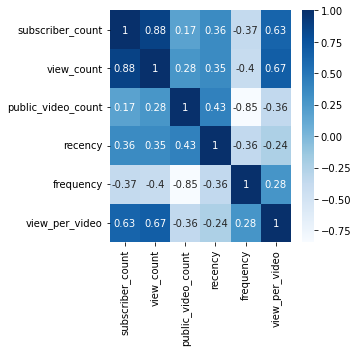

In [14]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(channel_info.corr(), cmap='Blues', annot=True, ax=ax)

plt.tight_layout()
plt.show()

From the heat map above, it is evident that the number of subscribers and the number of views/view per video ratio have positive correlations, meaning that channels whose more subscribers tend to have more views. This is understandable since viral videos tend to get promoted by Youtube, leading to an increase in views and subscriptions. On the other hand, Youtube also suggests to viewers videos of channels they subscribe to, making these videos likely to get watched.

## Video statistics per channel
Next, we will create functions to obtain video ids of each channel and information about each video including **channel name, video title, release date, tags, duration, view count, like count, and comment count**.

In [15]:
playlist_id_list = list(channel_info["playlist_id"])
playlist_id_list

['UUhWmYNTHQpLmJdkScwNrgcA',
 'UULRpI5yd10aJxSel3e6MlNw',
 'UUTKDB3h5zMdf_2siDHsd_yw',
 'UUplkk3J5wrEl0TNrthHjq4Q',
 'UUZH4EVUqljV-zkZEd0Ot7EQ',
 'UUpmD3iT-8TQzRuygIiS9bAw',
 'UULxAS02eWvfZK4icRNzWD_g',
 'UUgc00bfF_PvO_2AvqJZHXFg',
 'UUWrtsravWX0ANhHiJXNlyXw',
 'UUlkRzsdvg7_RKVhwDwiDZOA']

In [16]:
def get_video_id_df(playlist_id):
    all_ids = []
    
    request = youtube.playlistItems().list(
        part="snippet,contentDetails",
        playlistId = playlist_id,
        maxResults = 50
    )
    response = request.execute()

    for channel in response["items"]:
        id_info = {"channel_name": channel["snippet"]["channelTitle"],
                        "video_id": channel["contentDetails"]["videoId"]
               }
        all_ids.append(id_info)
        
    
    next_page_token = response.get("nextPageToken")
    
    while next_page_token is not None:
        request = youtube.playlistItems().list(
            part="snippet,contentDetails",
            playlistId = playlist_id,
            maxResults = 50,
            pageToken = next_page_token
        )
        response = request.execute()
        
        for channel in response["items"]:
            id_info = {"channel_name": channel["snippet"]["channelTitle"],
                        "video_id": channel["contentDetails"]["videoId"]
               }
            all_ids.append(id_info)
        
        next_page_token = response.get("nextPageToken") 
        
    return(pd.DataFrame(all_ids))

In [17]:
df_list = []
for i in playlist_id_list:
    df_i = get_video_id_df(i)
    df_list.append(df_i)

video_id_df = pd.concat(df_list, ignore_index = True)
video_id_df

,channel_name,video_id
0,Megan Nicole,YP-BpS8OgnA
1,Megan Nicole,UXwB9S2YAm4
2,Megan Nicole,FsRvUVE7UPA
3,Megan Nicole,cA_1d6u88Co
4,Megan Nicole,MImwNRd6Z3Y
...,...,...
3929,JFlaMusic,wAAkg3GpZnc
3930,JFlaMusic,cx5yWcvnfVk
3931,JFlaMusic,a--PMwm1f7g
3932,JFlaMusic,BkrrbDAca9w


In [18]:
video_id_df["channel_name"].value_counts()

Cimorelli              951
Kurt Hugo Schneider    694
Boyce Avenue           453
TheSamTsui             321
Madilyn Bailey         320
JFlaMusic              318
Megan Nicole           307
Conor Maynard          296
gootmusic              194
Music Travel Love       80
Name: channel_name, dtype: int64

In [19]:
video_id_list = list(video_id_df["video_id"])


In [20]:
def get_video_info_df(video_id):
    all_info = []
    
    request = youtube.videos().list(
        part="snippet,contentDetails,statistics",
        id=video_id
    )
    response = request.execute()

    for channel in response["items"]:
        try:
            info = {"channel_name": channel["snippet"]["channelTitle"],
                "video_title": channel["snippet"]["title"],
                "release_date": channel["snippet"]["publishedAt"],
                "tags": channel["snippet"]["tags"],
                "duration": channel["contentDetails"]["duration"],
                "view_count": channel["statistics"]["viewCount"],
                "like_count": channel["statistics"]["likeCount"],
                "comment_count": channel["statistics"]["commentCount"]
               }
        
        except:
             info = {"channel_name": None,
                "video_title": None,
                "release_date": None,
                "tags": None,
                "duration": None,
                "view_count": None,
                "like_count": None,
                "comment_count": None
               }    
            
        all_info.append(info)
        
    return(pd.DataFrame(all_info))

In [21]:
video_info_list = []
for i in video_id_list:
    df_i = get_video_info_df(i)
    video_info_list.append(df_i)
    
video_df = pd.concat(video_info_list, ignore_index = True)
video_df

,channel_name,video_title,release_date,tags,duration,view_count,like_count,comment_count
0,Megan Nicole,What Dreams Are Made Of - Hilary Duff (Megan N...,2023-01-30T18:21:01Z,"[megan nicole, megannicolemusic, lizzie mcguir...",PT3M20S,16173,973,91
1,Megan Nicole,Jingle Bells - Megan Nicole,2022-12-23T21:33:19Z,"[megan nicole, megannicolemusic, jingle bells,...",PT2M59S,19204,973,86
2,Megan Nicole,Christmas Wrapping - Megan Nicole,2022-12-17T16:37:15Z,"[megan nicole, megannicolemusic, Christmas wra...",PT3M8S,18041,843,96
3,Megan Nicole,Last Christmas - Megan Nicole (Official Lyric ...,2022-12-09T15:20:22Z,"[megan nicole, megannicolemusic, last christma...",PT3M6S,12076,589,48
4,Megan Nicole,Sleigh Ride - Megan Nicole (Official Lyric Video),2022-11-28T14:20:52Z,"[megan nicole, megannicolemusic, holiday, chri...",PT2M10S,10220,516,39
...,...,...,...,...,...,...,...,...
3929,JFlaMusic,Rihanna Ft. Calvin Harris - We Found Love ( co...,2011-09-27T13:35:35Z,"[rihanna, calvin harris, we found love, music,...",PT2M8S,604444,5806,441
3930,JFlaMusic,Adele - Someone Like You ( cover by J.Fla ),2011-09-12T14:48:39Z,"[adele, someone like you, music, cover, songs,...",PT4M49S,7257439,62523,3436
3931,JFlaMusic,Bruno Mars - The Lazy Song ( cover by J.Fla ),2011-09-04T12:44:20Z,"[bruno mars, the lazy song, acapella, music, c...",PT3M26S,1621687,22082,1724
3932,JFlaMusic,Jessie J - Price Tag ( cover by J.Fla ),2011-08-28T09:30:22Z,"[price tag, jessie j, live, music, cover, song...",PT2M44S,4657011,59717,3638


In [22]:
video_df.isnull().sum()

channel_name     298
video_title      298
release_date     298
tags             298
duration         298
view_count       298
like_count       298
comment_count    298
dtype: int64

After checking the number of null values, we will filter them out by creating a new dataframe called **video_df_no_none**.

In [23]:
video_df_no_none = video_df[~video_df["channel_name"].isnull()]
video_df_no_none

,channel_name,video_title,release_date,tags,duration,view_count,like_count,comment_count
0,Megan Nicole,What Dreams Are Made Of - Hilary Duff (Megan N...,2023-01-30T18:21:01Z,"[megan nicole, megannicolemusic, lizzie mcguir...",PT3M20S,16173,973,91
1,Megan Nicole,Jingle Bells - Megan Nicole,2022-12-23T21:33:19Z,"[megan nicole, megannicolemusic, jingle bells,...",PT2M59S,19204,973,86
2,Megan Nicole,Christmas Wrapping - Megan Nicole,2022-12-17T16:37:15Z,"[megan nicole, megannicolemusic, Christmas wra...",PT3M8S,18041,843,96
3,Megan Nicole,Last Christmas - Megan Nicole (Official Lyric ...,2022-12-09T15:20:22Z,"[megan nicole, megannicolemusic, last christma...",PT3M6S,12076,589,48
4,Megan Nicole,Sleigh Ride - Megan Nicole (Official Lyric Video),2022-11-28T14:20:52Z,"[megan nicole, megannicolemusic, holiday, chri...",PT2M10S,10220,516,39
...,...,...,...,...,...,...,...,...
3929,JFlaMusic,Rihanna Ft. Calvin Harris - We Found Love ( co...,2011-09-27T13:35:35Z,"[rihanna, calvin harris, we found love, music,...",PT2M8S,604444,5806,441
3930,JFlaMusic,Adele - Someone Like You ( cover by J.Fla ),2011-09-12T14:48:39Z,"[adele, someone like you, music, cover, songs,...",PT4M49S,7257439,62523,3436
3931,JFlaMusic,Bruno Mars - The Lazy Song ( cover by J.Fla ),2011-09-04T12:44:20Z,"[bruno mars, the lazy song, acapella, music, c...",PT3M26S,1621687,22082,1724
3932,JFlaMusic,Jessie J - Price Tag ( cover by J.Fla ),2011-08-28T09:30:22Z,"[price tag, jessie j, live, music, cover, song...",PT2M44S,4657011,59717,3638


In [24]:
video_df_no_none.isnull().sum()

channel_name     0
video_title      0
release_date     0
tags             0
duration         0
view_count       0
like_count       0
comment_count    0
dtype: int64

In [25]:
video_df_no_none["channel_name"].value_counts()

Cimorelli              828
Kurt Hugo Schneider    600
Boyce Avenue           450
Madilyn Bailey         312
TheSamTsui             310
JFlaMusic              291
Conor Maynard          279
Megan Nicole           277
gootmusic              183
Music Travel Love       79
MeganNicoleTV           17
cimorelliVEVO           10
Name: channel_name, dtype: int64

From the statistics above, it is evident that **Megan Nicole** and **Cimorelli** also placed some videos from their other channels in their main channels. Thus, we are about to integrate these videos into the main channels to facilitate our data analysis.

In [26]:
video_df_no_none1 = video_df_no_none.copy()

In [27]:
video_df_no_none1["channel_name"] = video_df_no_none1["channel_name"].replace(["MeganNicoleTV"],"Megan Nicole")

In [28]:
video_df_no_none1["channel_name"] = video_df_no_none1["channel_name"].replace(["cimorelliVEVO"],"Cimorelli")

In [29]:
video_df_no_none1["channel_name"].value_counts()

Cimorelli              838
Kurt Hugo Schneider    600
Boyce Avenue           450
Madilyn Bailey         312
TheSamTsui             310
Megan Nicole           294
JFlaMusic              291
Conor Maynard          279
gootmusic              183
Music Travel Love       79
Name: channel_name, dtype: int64

In [30]:
video_df_no_none1.dtypes

channel_name     object
video_title      object
release_date     object
tags             object
duration         object
view_count       object
like_count       object
comment_count    object
dtype: object

Next, we will format the **release_date** column, convert the **duration** column to seconds, convert the **view count, like count, and comment count** columns to numeric, and create some new columns:

**1. release_weekday** to get the day of the week from the corresponding **release_date**

**2. tag_count** to get the number of tags from the corresponding **tags**

**3. title_length** to get the length of the corresponding **video_title**


In [31]:
video_df_no_none1["release_date"] = video_df_no_none1["release_date"].apply(lambda x: parser.parse(x))
video_df_no_none1["release_hour"] = video_df_no_none1["release_date"].dt.hour

video_df_no_none1["release_date"] = video_df_no_none1["release_date"].dt.date

In [32]:
video_df_no_none1["release_weekday"] = video_df_no_none1["release_date"].apply(lambda x: x.strftime("%A"))
video_df_no_none1["duration"] = video_df_no_none1["duration"].apply(lambda x: isodate.parse_duration(x))
video_df_no_none1['duration'] = video_df_no_none1['duration'].astype('timedelta64[s]')
video_df_no_none1['tag_count'] = video_df_no_none1['tags'].apply(lambda x: 0 if x is None else len(x))
video_df_no_none1['title_length'] = video_df_no_none1['video_title'].apply(lambda x: len(x))

In [33]:
cols = ['like_count', 'view_count', 'comment_count']
video_df_no_none1[cols] = video_df_no_none1[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [34]:
video_df_no_none1.head()

,channel_name,video_title,release_date,tags,duration,view_count,like_count,comment_count,release_hour,release_weekday,tag_count,title_length
0,Megan Nicole,What Dreams Are Made Of - Hilary Duff (Megan N...,2023-01-30,"[megan nicole, megannicolemusic, lizzie mcguir...",200.0,16173,973,91,18,Monday,13,58
1,Megan Nicole,Jingle Bells - Megan Nicole,2022-12-23,"[megan nicole, megannicolemusic, jingle bells,...",179.0,19204,973,86,21,Friday,14,27
2,Megan Nicole,Christmas Wrapping - Megan Nicole,2022-12-17,"[megan nicole, megannicolemusic, Christmas wra...",188.0,18041,843,96,16,Saturday,12,33
3,Megan Nicole,Last Christmas - Megan Nicole (Official Lyric ...,2022-12-09,"[megan nicole, megannicolemusic, last christma...",186.0,12076,589,48,15,Friday,10,52
4,Megan Nicole,Sleigh Ride - Megan Nicole (Official Lyric Video),2022-11-28,"[megan nicole, megannicolemusic, holiday, chri...",130.0,10220,516,39,14,Monday,12,49


## Relationships between the number of views and the other variables
Next, we will examine the relationships between variables.

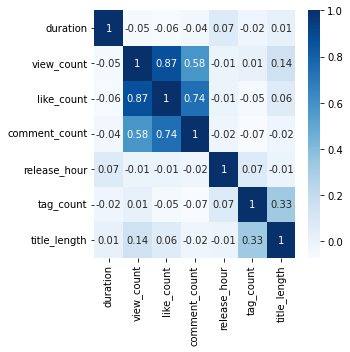

In [35]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(round(video_df_no_none1.corr(),2), cmap='Blues', annot=True, ax=ax)

plt.tight_layout()
plt.show()

From the heat map above, it is evident that the number of likes and comments has a strong positive relationship with the number of views. The other factors have weak relationships with the number of views.

We are about to plot these relationships for better transparency.

<AxesSubplot:xlabel='like_count', ylabel='view_count'>

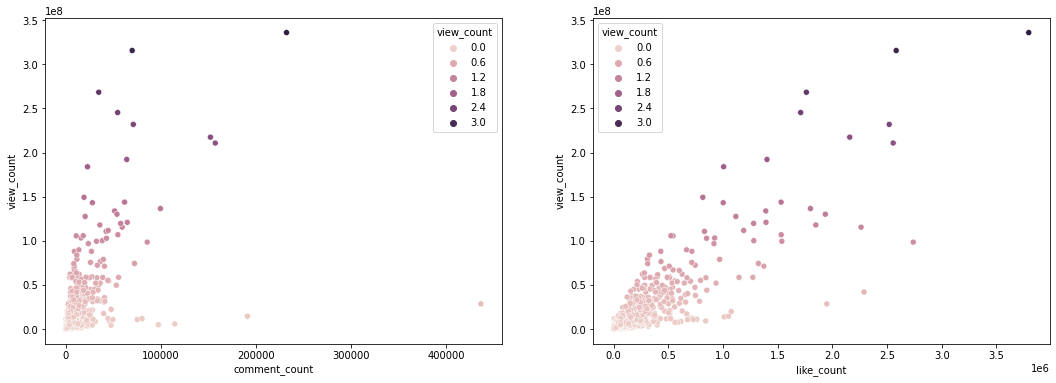

In [36]:
fig, ax =plt.subplots(1,2, figsize=(18,6))
sns.scatterplot(data = video_df_no_none1, x = "comment_count", y = "view_count", ax=ax[0], hue = "view_count")
sns.scatterplot(data = video_df_no_none1, x = "like_count", y = "view_count", ax=ax[1], hue = "view_count")

From the plots above, it is clear that videos whose more comments/likes tend to get more views and vice versa.

<AxesSubplot:xlabel='title_length', ylabel='view_count'>

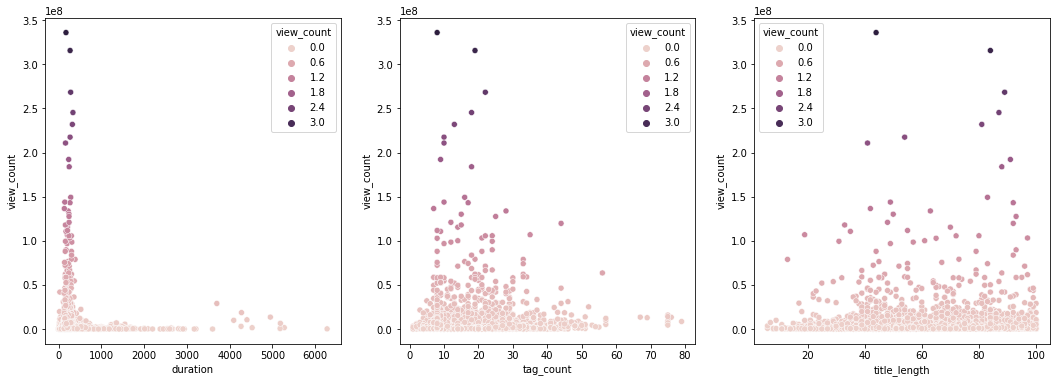

In [37]:
fig, ax =plt.subplots(1,3, figsize=(18,6))
sns.scatterplot(data = video_df_no_none1, x = "duration", y = "view_count", ax=ax[0], hue = "view_count")
sns.scatterplot(data = video_df_no_none1, x = "tag_count", y = "view_count", ax=ax[1], hue = "view_count")
sns.scatterplot(data = video_df_no_none1, x = "title_length", y = "view_count", ax=ax[2], hue = "view_count")

From the plots above, it is clear that short videos have more views than long ones. In addition, videos whose 10-30 tags tend to have more views than those whose number of tags is outside the range. On a different note, most-viewed videos have title lengths of 30-95 characters.

## View distribution of each channel
Now, we are going to examine the distribution of views per channel.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


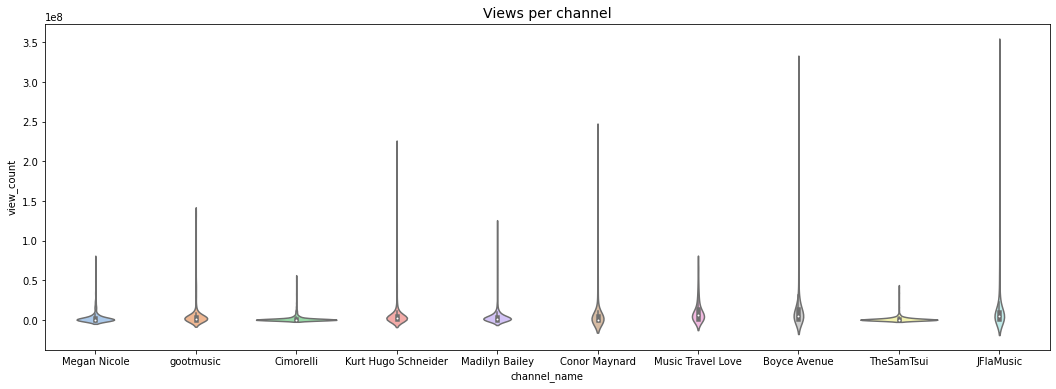

In [38]:
plt.rcParams['figure.figsize'] = (18, 6)
sns.violinplot(video_df_no_none1['channel_name'], video_df_no_none1['view_count'], palette = 'pastel')
plt.title('Views per channel', fontsize = 14)
plt.show()

From the plot above, it is transparent that JFla Music, Conor Maynard, Boyce Avenue, and Kurt Hugo Schneider have a large variance in their views, indicating that they have a few viral videos. Conversely, The Sam Tsui and Cimorelli have a small variance in their views, indicating that they have a high view consistency across videos.

## Video publishing practices
Next, we will find out which day of the week popular music cover artists tend to publish their videos on.

<AxesSubplot:>

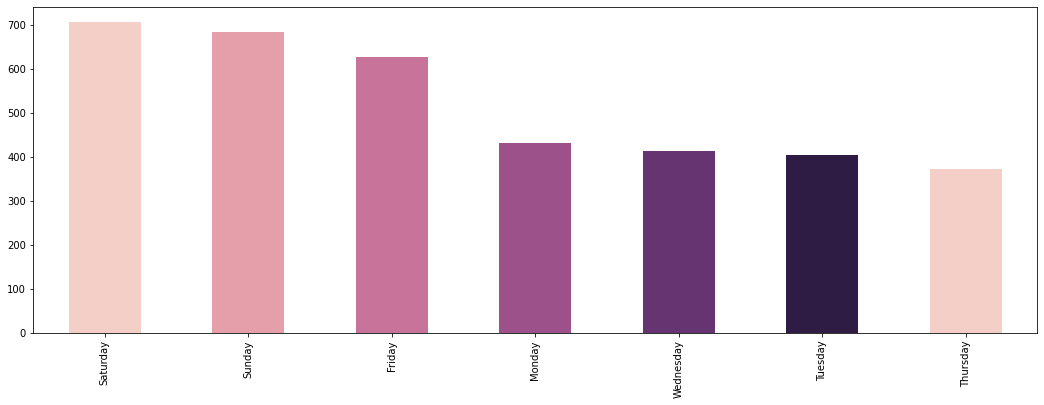

In [39]:
video_df_no_none1["release_weekday"].value_counts().plot.bar(color=sns.cubehelix_palette(hue=1))

From the plot above, it is evident that music cover artists tend to release music products on weekends, which is probably due to the fact that they think audiences are likely to look for music covers for relaxation on weekends rather than weekdays. In other words, publishing videos on weekends has a high probability of getting more views than doing that during weekdays.

Next, we will find out the music cover artists tend to publish their videos at which hour of the day.

In [40]:
video_df_no_none1.loc[:, ["release_weekday", "release_hour"]].value_counts()[:10]   

release_weekday  release_hour
Friday           12              173
Saturday         15              164
Sunday           15              119
Saturday         16              105
Sunday           16               91
                 13               58
                 14               58
Friday           13               53
Saturday         17               52
Sunday           17               48
dtype: int64

From the statistics above, we can see that most of the examined music cover channels often release videos at noon on Fridays or at 3 p.m. on Saturdays or Sundays.

Next, we will explore popular tags for music cover videos.

In [41]:
tag_dict = {}

for tag_list in video_df_no_none1["tags"]:
    for tag in tag_list:
        if tag in tag_dict:
            tag_dict[tag] +=1
        else:
            tag_dict[tag] =1
            
sorted_tag_dict_dict = dict(sorted(tag_dict.items(), key=operator.itemgetter(1),reverse=True)[:30])
sorted_tag_dict_dict

{'cover': 1218,
 'lyrics': 727,
 'acoustic': 692,
 'music': 543,
 'cimorelli': 518,
 'live': 446,
 'music video': 395,
 'official': 374,
 'piano': 364,
 'Pop': 341,
 'Music': 334,
 'kurt hugo schneider': 331,
 'Top40 hits': 304,
 'Sam Tsui Medley': 304,
 'Sam Tsui Wedding': 303,
 'I’m Not the Only One': 303,
 'Sam Tsui Mashup': 302,
 'Sam Tsui Vlogs': 302,
 'Sam Tsui Cover': 298,
 'cimorelli sisters': 296,
 'Let it Go': 295,
 'Sam Tsui': 294,
 'Frozen': 292,
 'Imagine Dragons Mashup': 291,
 'Frozen Mashup': 289,
 'Delicate Taylor Swift': 287,
 'Counting Stars Mashup': 282,
 'Safe and Sound Cover': 281,
 'Careless Whisper Cover': 281,
 '제이플라': 279}

From the list above, it is evident that well-known cover artists usually use keywords such as **"cover", "lyrics", "acoustic", "music", their names, song names, and names of original artists**.

## Implications for music cover artists on Youtube

1. Encourage viewers to like, comment on, and share videos or use marketing tactics to make it known by new viewers, increasing the chance of getting more views and subscriptions. Indeed, this project explored strong positive correlations between likes, comments and view counts as well as between the number of subscribers and that of views.
2. Prioritize video quality maximization over video publishing frequency maximization. Indeed, this project pointed out that the top 4 channels having the highest view-per-video ratio publish 1-2 videos per month on average.
3. Make short videos (below 500s) to maximize the number of views. In fact, this study found out short videos get more views than long ones.
4. Use 10-30 relevant tags to maximize the number of views. This project discovered keywords that successful music cover channels usually use are **"cover", "lyrics", "acoustic", "music", their names, song names, and names of original artists**.
5. Use 30-95 characters for video titles and release music products at noon on Fridays or at 3 p.m. on Saturdays or Sundays to maximize the number of views as successful music cover channels have done so far.

## Limitations and suggestions for future research

1. This project used a small sample size of 10 Youtube channels due to a quota limit for daily usage of Youtube API. Future research is encouraged to increase the sample size to obtain more representative findings for the whole music cover community.
2. The examined channels were chosen based on suggestions from the two following sites. While the first one did not mention its criteria for choosing the top 10 best Youtube cover artists, the other one also included votes from its users and personal preference in addition to subscriber numbers and views, diminishing the objectivity of this project. Thus, future research could ask Youtube for the list of the most popular music cover channels on its platform to increase the objectivity of research.
+ https://www.thetoptens.com/youtube/best-youtube-cover-artists/

+ https://youtu.be/MLjivDSHXCc

3. This project only covered a few elements of Youtube channels and videos due to a quota limit for daily usage of Youtube API. Future research could enrich their findings by examing other factors such as video comments, thumbnail quality, video quality, caption, projection format of the video, and video caption.
4. Future research is encouraged to apply for an additional quota extension if more data is needed for thorough investigations, however, the daily quota is reached.